In [3]:
import pandas as pd
import datetime
import numpy as np
import os
import acoustic_data_science.config as config

In [4]:
df = pd.read_feather(path=config.processed_data_path + '/2018_10.feather')
df = df[df['loud']]
df.head()

,index,1213,25.1188643150958,31.6227766016838,39.8107170553497,50.1187233627272,63.0957344480193,79.4328234724282,100,125.892541179417,...,12589.2541179417,15848.9319246112,19952.6231496888,25118.8643150958,filename,timestamp,broadband_spl,background,loud,short_transient
70250,941735,737334.3750,78.571564,83.622559,92.593529,95.759750,94.778458,97.372002,99.638802,99.000412,...,97.647339,93.943268,91.566376,88.703781,ICLISTENHF1266_20181001T094302.000Z_TOL_1sHann...,2018-10-01 09:44:41.000,-28.224725,-40.055466,True,False
70251,941736,737334.3750,87.666504,86.584129,91.294365,93.792282,95.308609,96.976013,100.511887,99.284904,...,97.034561,93.424431,90.889343,87.823425,ICLISTENHF1266_20181001T094302.000Z_TOL_1sHann...,2018-10-01 09:44:41.500,-28.013350,-40.053839,True,False
70253,941738,737334.3750,68.029160,86.068504,90.795334,90.487389,96.244118,92.463181,95.305389,94.965172,...,83.129974,83.316116,80.422134,75.790993,ICLISTENHF1266_20181001T094302.000Z_TOL_1sHann...,2018-10-01 09:44:42.500,-29.387584,-40.052436,True,True
102149,3381269,737334.5625,68.938316,82.048851,88.160599,92.339470,93.758781,91.908249,96.500031,96.012779,...,86.935928,77.346184,73.649254,67.749687,ICLISTENHF1266_20181001T140804.000Z_TOL_1sHann...,2018-10-01 14:11:05.000,-26.672399,-39.147595,True,True
126386,540313,737334.7500,75.868980,112.823212,91.339500,93.907883,96.970306,91.230461,94.443504,97.510254,...,74.339256,72.899437,72.730766,70.346725,ICLISTENHF1266_20181001T173303.000Z_TOL_1sHann...,2018-10-01 17:33:31.500,-28.747901,-38.825818,True,True


In [32]:
len(float_tol_columns)

31

In [49]:
def get_transient_durations(df):
    df['index_group'] = (df['index'] - np.arange(df.shape[0]))
    index_groups = df['index_group'].unique()
    
    transient_durations = []
    for index_group in index_groups:
        transient_times = df[df['index_group']==index_group]['timestamp'].values
        transient_durations.append((transient_times[-1] - transient_times[0]).astype('float')/1e9 + 0.5)
    
    # Cull any detected transient with length longer than 5 mins. Arbitrary for now.
    #transient_durations[i] = transient_durations[transient_durations < 5*60]
    transient_durations = np.array(transient_durations)

    return transient_durations

In [50]:
data_path = config.processed_data_path

months = config.get_months(data_path)
monthly_transient_durations = []

for feather_path in config.get_feather_paths(data_path):
    print(feather_path)
    
    df = pd.read_feather(feather_path)
    monthly_transient_durations.append(get_transient_durations(df))

../data/processed/2018_08.feather
../data/processed/2018_09.feather
../data/processed/2018_10.feather
../data/processed/2018_11.feather
../data/processed/2018_12.feather
../data/processed/2019_01.feather
../data/processed/2019_02.feather
../data/processed/2019_03.feather
../data/processed/2019_04.feather
../data/processed/2019_05.feather


In [57]:
def report_transient_stats(transient_durations):
    print('min (s)', transient_durations.min())
    print('max (mins)', transient_durations.max()/ 60) 
    print('sd ', transient_durations.std())
    
    print('durations > 0.5 ' , len(transient_durations[transient_durations>0.5]))
    print('durations = 0.5 ', len(transient_durations[transient_durations==0.5]))

In [52]:
'''
for transient_durations, month in zip(monthly_transient_durations, months):
    plt.figure(figsize=(8,6))
    plt.title(month)
    plt.hist(transient_durations, bins=10)
    plt.show()

    report_transient_stats(transient_durations)
'''

'\nfor transient_durations, month in zip(monthly_transient_durations, months):\n    plt.figure(figsize=(8,6))\n    plt.title(month)\n    plt.hist(transient_durations, bins=10)\n    plt.show()\n\n    report_transient_stats(transient_durations)\n'

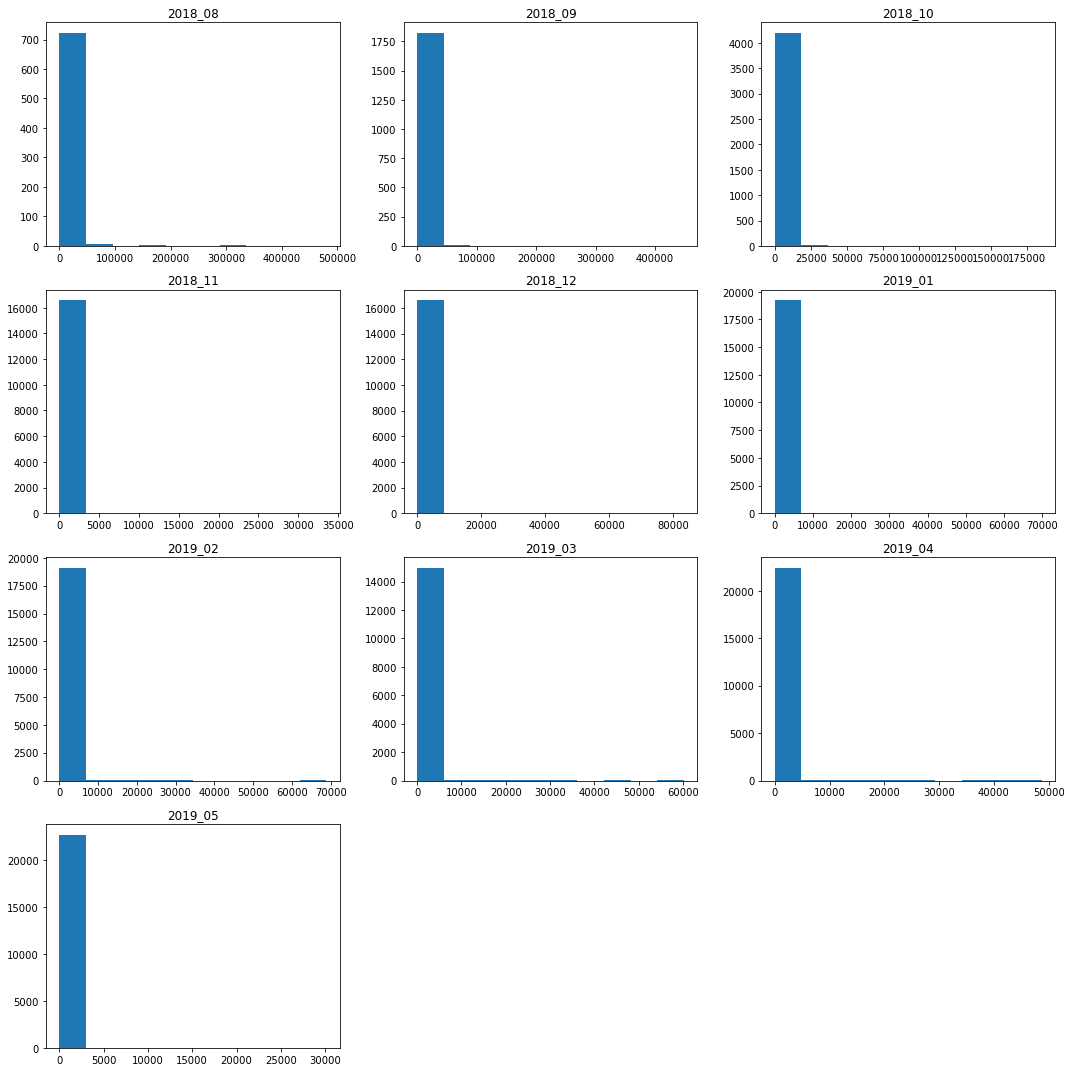

In [53]:
fig = plt.figure(figsize=(15,15))

i = 0
for transient_durations, month in zip(monthly_transient_durations, months):
    i+=1
    ax = fig.add_subplot(4,3,i)
    ax.set_title(month)
    ax.hist(transient_durations, bins=10)

plt.tight_layout()
plt.show()

In [58]:
for transient_durations, month in zip(monthly_transient_durations, months):
    print(month)
    report_transient_stats(transient_durations)
    print()
    

2018_08
min (s) 0.5
max (mins) 7997.049883333334
sd  31619.904446537977
durations > 0.5  669
durations = 0.5  65

2018_09
min (s) 0.5
max (mins) 7473.241666666667
sd  18908.35236551917
durations > 0.5  1763
durations = 0.5  69

2018_10
min (s) 0.5
max (mins) 3089.5926000000004
sd  5514.455018511971
durations > 0.5  3933
durations = 0.5  285

2018_11
min (s) 0.5
max (mins) 559.01655
sd  542.884808740349
durations > 0.5  15994
durations = 0.5  620

2018_12
min (s) 0.5
max (mins) 1391.1083333333333
sd  1164.9748694881275
durations > 0.5  16374
durations = 0.5  251

2019_01
min (s) 0.5
max (mins) 1163.2748833333333
sd  1081.3074806066925
durations > 0.5  18833
durations = 0.5  435

2019_02
min (s) 0.5
max (mins) 1147.74235
sd  790.20880052752
durations > 0.5  19129
durations = 0.5  20

2019_03
min (s) 0.5
max (mins) 1003.6332166666667
sd  1081.0511070588984
durations > 0.5  14768
durations = 0.5  259

2019_04
min (s) 0.5
max (mins) 811.975
sd  590.0641198208176
durations > 0.5  22136
durat

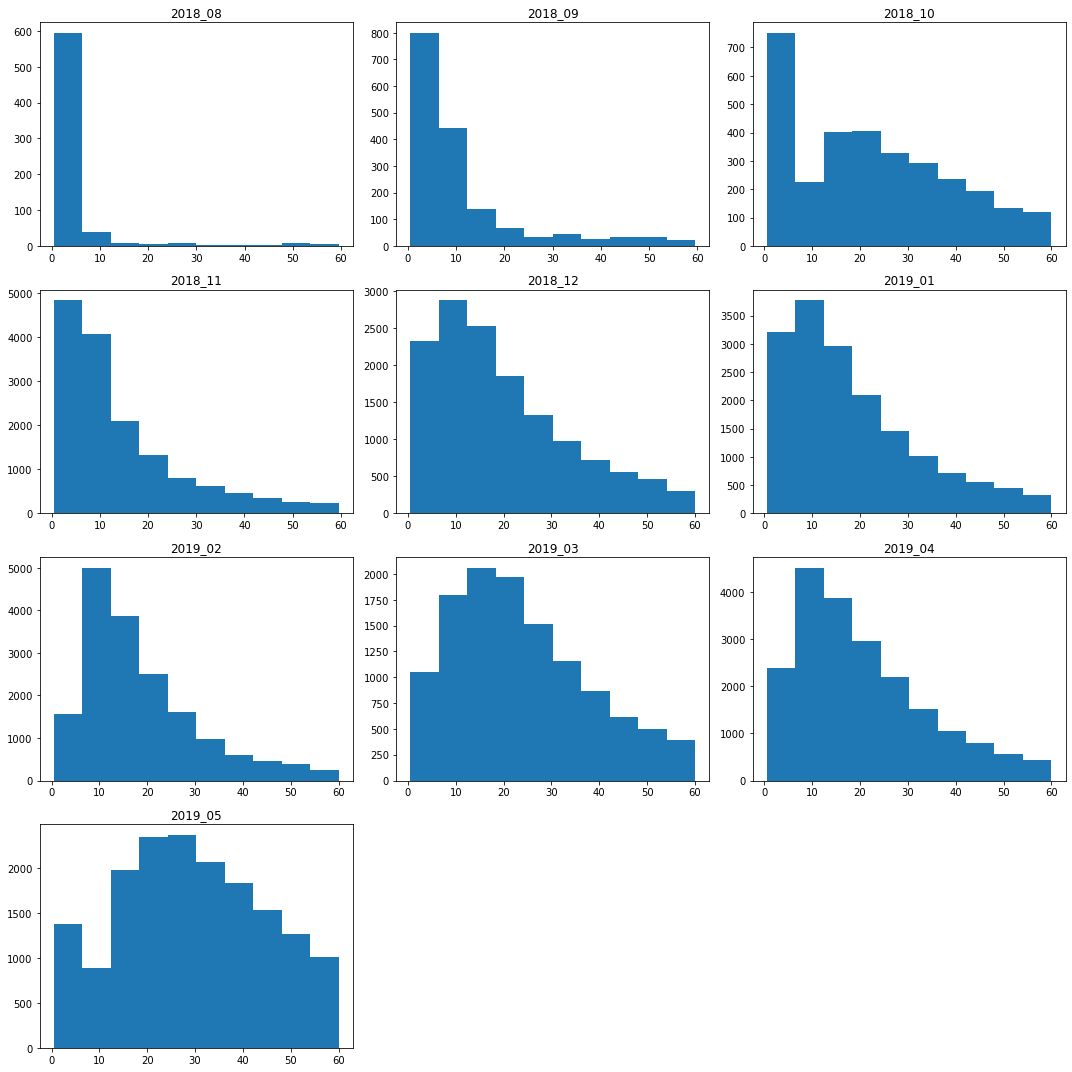

In [43]:
fig = plt.figure(figsize=(15,15))

i = 0
for transient_durations, month in zip(monthly_transient_durations, months):
    i+=1
    ax = fig.add_subplot(4,3,i)
    ax.set_title(month)
    ax.hist(transient_durations[transient_durations<60], bins=10)

plt.tight_layout()
plt.show()